In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib 

In [3]:
# Load the dataset
df = pd.read_csv('college_student_placement_dataset.csv')
# Drop duplicates
df.drop_duplicates(inplace=True)

# categorical columns to numerical
df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0})
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})

# Select features (X) and target (y)
features = ['IQ', 'CGPA', 'Internship_Experience', 'Projects_Completed', 'Communication_Skills']
target = 'Placement'

X = df[features]
y = df[target]

print("Selected Features (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())

Selected Features (X):
    IQ  CGPA  Internship_Experience  Projects_Completed  Communication_Skills
0  107  6.28                      0                   4                     8
1   97  5.37                      0                   0                     8
2  109  5.83                      0                   1                     1
3  122  5.75                      1                   1                     6
4   96  7.69                      0                   2                    10

Target Variable (y):
0    0
1    0
2    0
3    0
4    0
Name: Placement, dtype: int64


In [4]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete!")

Training the model...
Model training complete!


Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00      1674
      Placed       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:


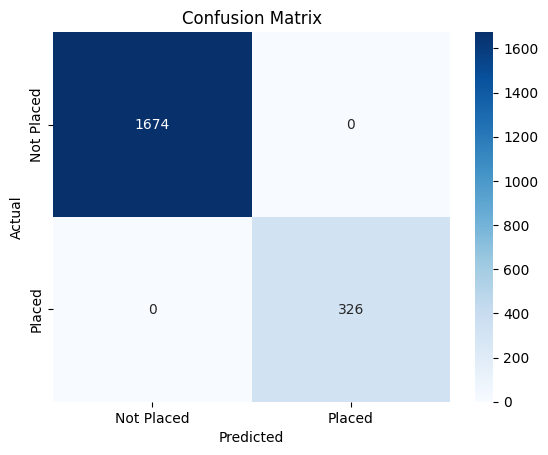

In [5]:
# Model Evaluation
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Placed', 'Placed']))

# confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
# Saving the model
joblib.dump(model, 'placement_model.joblib')
print("Model saved successfully as 'placement_model.joblib'")

Model saved successfully as 'placement_model.joblib'
